Loads audio files organised in separate Iqaa (Arabic rythms) folders and extract **mel** features for later modelling step

In [1]:

import librosa
import librosa.display
from IPython.display import Audio as IpythonAudio
import matplotlib.pyplot as plt
import os
# from __future__ import print_function
import numpy as np
import pandas as pd

%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
DATA_FOLDER = '/Users/amr/repos/jasim/data/iqaa/'
SAVING_PATH = '/Users/amr/repos/jasim/processed_data/iqaa/'
WINDOW_SIZE= 4

if not os.path.exists(SAVING_PATH):
    os.makedirs(SAVING_PATH)

In [4]:
def data_chunker(dataList, window=10, stride=1):
    '''
    convert data list to chunks of defined window size parameter sliding with stride size parameter

    double check the edges. what is range limit
    Parameters
    ----------


    Returns
    -------
    List of lists
    '''

    arr = np.array(dataList)

    if arr.size==0:
        logging.warning("""data_chunker received an empty dataList""")
        return np.array([[]])

    padded_dataList = np.pad(arr, (window-stride,stride), 'wrap')#'reflect')

    if padded_dataList.ndim <2:
        return [padded_dataList[i:i+window] for i in range(0,len(padded_dataList)-window, stride)]
    else:
        return [padded_dataList[:,i:i+window] for i in range(0,padded_dataList.shape[-1]- window, stride)]

    
def load_file(audio_path):

    y, sr = librosa.load(audio_path)
    
    return y, sr

def get_percussion(y):
    
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    return y_percussive


def get_mel(y, sr):
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_S = librosa.amplitude_to_db(S)
    
    return log_S

def mel_slices_from_audio(y, sr, window_size_seconds, stride):
    

    y_chunks= data_chunker(y, window= sr*window_size_seconds, stride=stride)
    
    mel_matrix = []
    
    for chunk in y_chunks:

        mel_slice= get_mel(chunk, sr)
        
        mel_matrix.append(mel_slice)
        
    return np.array(mel_matrix)  


In [6]:
maqams_folders = [x for x in os.listdir(DATA_FOLDER) if os.path.isdir(os.path.join(DATA_FOLDER, x)) if not x.startswith('.')]

X = [[] for _ in maqams_folders]
target = []
song_names = []


for i, maqam_name in enumerate(maqams_folders):
    
    print('extracting mel\'s from maqam: {}'.format(maqam_name))
    
    maqams_audio_files = [x for x in os.listdir(os.path.join(DATA_FOLDER, maqam_name)) if x.split('.')[-1] == 'mp3']

    mel_matrix = [[] for _ in maqams_audio_files]
    
    if maqams_audio_files != []:
    
        for j, file_name in enumerate(maqams_audio_files):

            file_path = os.path.join(DATA_FOLDER, maqam_name, file_name)
            y, sr = load_file(file_path)
            y_percussion= get_percussion(y)
            mel_matrix[j]= mel_slices_from_audio(y_percussion, sr, window_size_seconds=5, stride=int(sr/4))
            
            song_names.extend([file_name for _ in range(mel_matrix[j].shape[0])])
            
        mel_matrix = np.vstack(mel_matrix)
    
        X[i]= mel_matrix
        target.extend([maqam_name for _ in range(mel_matrix.shape[0])])
    
X = np.vstack([m for m in X if m !=[]])

extracting mel's from maqam: Ciftetelli 8-4
extracting mel's from maqam: Fox 2-4
extracting mel's from maqam: Ayyub 2-4
extracting mel's from maqam: Khosh Rang 17-8
extracting mel's from maqam: Awfar Masri 19-4
extracting mel's from maqam: Muhajjar 14-4
extracting mel's from maqam: Wahda Kabira 8-4
extracting mel's from maqam: Sa‘idi 4-4
extracting mel's from maqam: Nawari 4-4
extracting mel's from maqam: Thurayya 5-8
extracting mel's from maqam: Sama‘i Darij 3-4
extracting mel's from maqam: Katakufti 8-8
extracting mel's from maqam: Murabba‘ 13-4
extracting mel's from maqam: Mudawwar Masri 12-4
extracting mel's from maqam: Maqsum 4-4
extracting mel's from maqam: Baladi 4-4
extracting mel's from maqam: Fallahi 2-4
extracting mel's from maqam: Rumba 4-4
extracting mel's from maqam: Sittatu ‘Ashar Masri 32-4
extracting mel's from maqam: Wahda w-Nuss 4-4
extracting mel's from maqam: Malfuf 2-4
extracting mel's from maqam: Hacha‘ 4-4
extracting mel's from maqam: Zaffa 4-4
extracting mel's 

## Save parsed data

In [8]:
np.save(os.path.join(SAVING_PATH,'mels.npy'), X)
np.savetxt(os.path.join(SAVING_PATH,'target.txt'), target, fmt='%s')
np.savetxt(os.path.join(SAVING_PATH,'songs_names.txt'), song_names, fmt='%s')

In [10]:
mel_matrix.shape

(905, 128, 216)

In [11]:
X.shape

(36384, 128, 216)

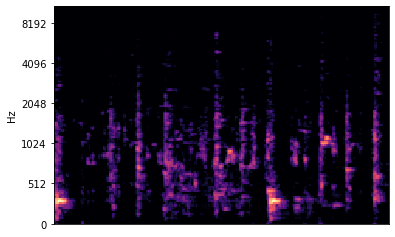

In [12]:
librosa.display.specshow(mel_matrix[110], sr=sr, x_axis=None, y_axis='mel') # x_axis='time'

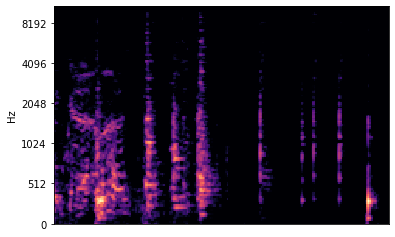

In [13]:
librosa.display.specshow(mel_matrix[8], sr=sr, x_axis=None, y_axis='mel') # x_axis='time'

In [14]:
mel_matrix[8].max()

40.600533

In [15]:
mel_matrix[3].min()

-29.593315

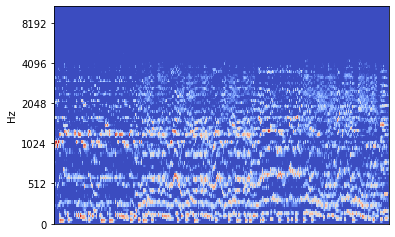

In [16]:


y_harmonic, y_percussive = librosa.effects.hpss(y)


# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S)



librosa.display.specshow(log_S, sr=sr, x_axis=None, y_axis='mel') # x_axis='time'

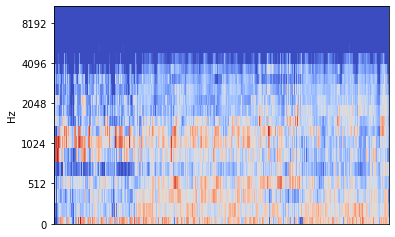

In [17]:


y_harmonic, y_percussive = librosa.effects.hpss(y)


# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=20)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S)



librosa.display.specshow(log_S, sr=sr, x_axis=None, y_axis='mel') # x_axis='time'

In [18]:
log_S.shape

(20, 2648)

In [19]:
log_S.shape

(20, 2648)

In [20]:
IpythonAudio(y, rate=sr)

In [21]:
IpythonAudio(y_percussion, rate=sr)

In [25]:
!open {SAVING_PATH}

In [22]:
# import pickle
# with open("target.txt", "wb") as fp:   #Pickling
# pickle.dump(target, fp)

# with open("test.txt", "rb") as fp:   # Unpickling
#     b = pickle.load(fp)

In [23]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# # names  = [x for folder in [Config.training_dir, Config.validation_dir, Config.testing_dir] for x in os.listdir(folder)]
# # le.fit(names)